In [2]:
import numpy
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas 
import statistics

In [3]:
def extract_data(filename):
    df = pandas.read_csv(filename)
    ydata = df.T1.values 
    udata = df.Q1.values 
    return ydata, udata, df.Time.values

In [6]:
def ARX(filename):
    ydata, udata, time = extract_data(filename)
    ARX_results = sm.tsa.AR(ydata).fit()
    y_arx = ARX_results.predict()
    t_arx = time[:len(y_arx)]
    return y_arx, t_arx

In [28]:
def Results(filename):
    y_arx, t_arx = ARX(filename)
    df = pandas.read_csv(filename)
    plt.plot(df.Time, df.T1, '.', label = 'observation')
    plt.plot(t_arx, y_arx, label = 'ARX prediction')
    plt.ylabel('Temperature 1 (degress celcius)')
    plt.xlabel('Time (s)')
    plt.title(filename)
    plt.legend()
    plt.show()

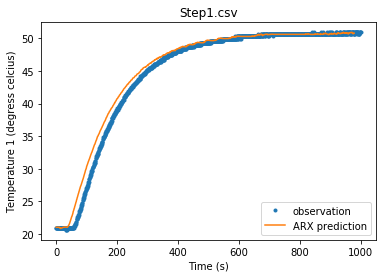

In [29]:
Results('Step1.csv')

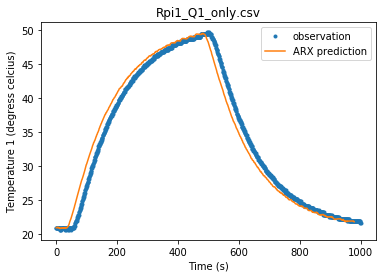

In [30]:
Results("Rpi1_Q1_only.csv")

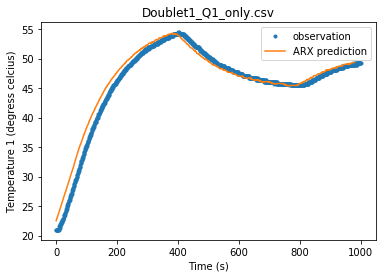

In [31]:
Results("Doublet1_Q1_only.csv")

## Calculating the error

In [32]:
def error(filename):
    ydata, udata, time = extract_data(filename)
    y_arx, t_arx = ARX(filename)
    ϵ = (ydata[:len(y_arx)] - y_arx)**2
    
    plt.subplot(2,1,1)
    plt.plot(t_arx, numpy.sqrt(ϵ), label = 'error = (y_measure - y_predict)**2')
    plt.xlabel('time')
    plt.ylabel('error')
    plt.legend()
    plt.subplot(2,1,2)
    plt.plot(t_arx, udata[:len(y_arx)], label = 'Input')
    plt.xlabel('time')
    plt.ylabel('input data')
    plt.legend()
    

$$ error = (y_m - y_p)^2 $$
$$ m = measure; p = predict$$

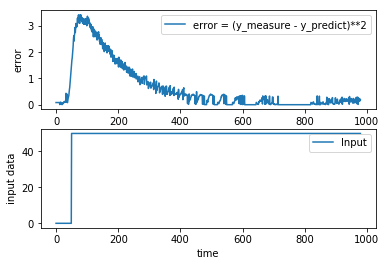

In [33]:
error('Step1.csv')

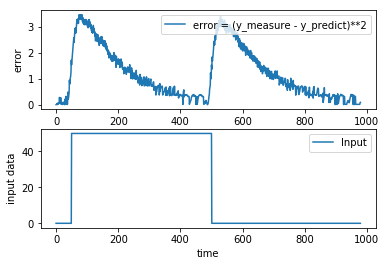

In [34]:
error('Rpi1_Q1_only.csv')

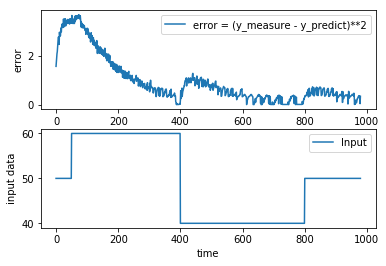

In [35]:
error('Doublet1_Q1_only.csv')

In [117]:
def noise_level(filename, N):
    
    ydata, udata, time = extract_data(filename)
    y_arx, t_arx = ARX(filename)
    yfs = []
    yf = ydata[0]
    for t, ti in enumerate(t_arx):
        ym = ydata[0] if t-N<0 else ydata[t-N]
        yf =  yf + (1/N)*(ydata[t] - ym)
#         print(ydata[t], ym)
        yfs.append(yf)
        
    ϵ = abs(yfs - y_arx)
    noise = abs(ydata[:len(y_arx)] - yfs)
    
    return noise , ϵ


## Playing around with ideas to measure noise power

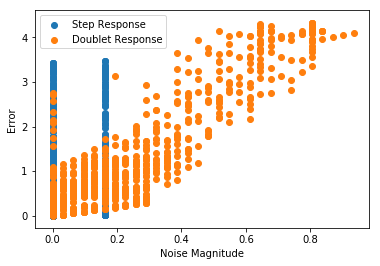

In [124]:
plt.scatter(*noise_level('Step1.csv', 2), label = 'Step Response')
# plt.scatter(*noise_level('Rpi1_Q1_only.csv', 20), label = 'Rectangular Pulse Response')
plt.scatter(*noise_level('Doublet1_Q1_only.csv', 10), label = 'Doublet Response')
plt.xlabel('Noise Magnitude')
plt.ylabel('Error')
plt.legend()